<a href="https://colab.research.google.com/github/LisaCh24/astrodata/blob/main/Calculate_Velocity_Around_Bulge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import astropy.constants as const # import a Python package to call the value of certain constants
import astropy.units as u # import a Python package to call certain units, e.g., the mass of the Sun
import numpy as np #lets us do math

In [ ]:
def CalculatingOrbitalVelocity (M,R):
  orbitalvelocity = np.sqrt(const.G * M / R) # The formula we will use to calculate orbital velocity
  return orbitalvelocity # The result is orbital velocity
print (const.G) # Show G

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [ ]:
M_bulge = 1.5 * 10**10 * u.solMass  # The solar mass of the bulde is 1.5 * 10^10, use ** for ^ in python
print (M_bulge.to(u.kg)) #Show the mass of the bulge as kg (change solMass to kg to use the formula)

2.9826148060470763e+40 kg


In [ ]:
R_arr = (np.arange(1,30) * u.kpc) # Use radii OUTSIDE of bulge (doesn't include radius of bulge)
print(R_arr.to(u.km)) # Show the radii as km to use in formula

[3.08567758e+16 6.17135516e+16 9.25703274e+16 1.23427103e+17
 1.54283879e+17 1.85140655e+17 2.15997431e+17 2.46854207e+17
 2.77710982e+17 3.08567758e+17 3.39424534e+17 3.70281310e+17
 4.01138086e+17 4.31994861e+17 4.62851637e+17 4.93708413e+17
 5.24565189e+17 5.55421965e+17 5.86278740e+17 6.17135516e+17
 6.47992292e+17 6.78849068e+17 7.09705844e+17 7.40562620e+17
 7.71419395e+17 8.02276171e+17 8.33132947e+17 8.63989723e+17
 8.94846499e+17] km


In [ ]:
v_bulge = CalculatingOrbitalVelocity (M_bulge, R_arr) #calculate the orbital velocity using the formula
print (v_bulge.to (u.km/u.s)) # Show the velocities with the unit km/s

[253.99558864 179.60200312 146.64442148 126.99779432 113.59028044
 103.69326485  96.00130881  89.80100156  84.66519621  80.32045757
  76.58255145  73.32221074  70.44570143  67.88317646  65.58137899
  63.49889716  61.60297885  59.86733437  58.27058437  56.79514022
  55.42638148  54.15204145  52.96174134  51.84663242  50.79911773
  49.81263319  48.88147383  48.0006544   47.16579673] km / s


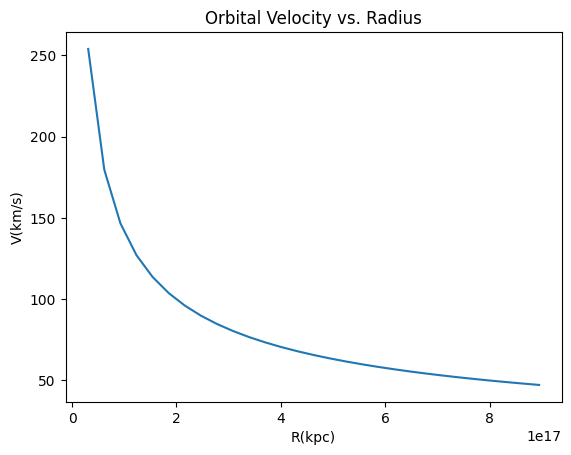

In [ ]:
import matplotlib.pyplot as plt #import package to add plot
plt.plot (R_arr.to(u.km), v_bulge.to(u.km/u.s)) #Define the axes as Radius and Velocity
plt.xlabel ("R(kpc)") # Name the x axis
plt.ylabel ("V(km/s)") # Name the y axis
plt.title ("Orbital Velocity vs. Radius") # Name the plot
plt.show () #show the plot

In [ ]:
M_disk = 1e11 * u.solMass # Define disk total mass
R_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # here the density is in the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2)) # show the density of the disk

318.3098861837907 1e+06 solMass / kpc2


In [ ]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc: # The mass changes depending on the radius (10 kpc)
        M = np.pi * (R**2) * density #Mass formula
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density # mass formula
    return(M) # This gives us mass of the disk at a specific R


In [ ]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc") #Testing to make sure mass is different at different Radius

999.0264638415543 1e+06 solMass at 1 kpc
24975.66159603886 1e+06 solMass at 5 kpc


In [ ]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass): # What we're solving and important variables
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk) # defining M_disk
    M_total = M_disk + M_bulge # For now, the total mass is disk + bulge (we add halo later)
    return(M_total) # This calculatingEnclosedMassForMilkyWay formula gives us total mass of disk and bulge


In [ ]:
# redefine v_bulge_arr to avoid confusion
v_bulge_arr = CalculatingOrbitalVelocity (M_bulge, R_arr)
print (v_bulge_arr.to (u.km/u.s)) # Shows us velocity of bulge from R=1 kpc to R=30 kpc

[253.99558864 179.60200312 146.64442148 126.99779432 113.59028044
 103.69326485  96.00130881  89.80100156  84.66519621  80.32045757
  76.58255145  73.32221074  70.44570143  67.88317646  65.58137899
  63.49889716  61.60297885  59.86733437  58.27058437  56.79514022
  55.42638148  54.15204145  52.96174134  51.84663242  50.79911773
  49.81263319  48.88147383  48.0006544   47.16579673] km / s


In [ ]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_total = np.zeros(len(R_arr)) * u.solMass # Set them as zero for now since they are different at different radii

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)): # Use the [i] for different R in the arr
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i]) # Finds mass of disk at a specific R
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i]) # Finds total mass at a specific R

# Calculating the resulting orbital velocity due to each component
v_disk_arr = CalculatingOrbitalVelocity(M_disk, R_arr) # Finding orbital velocity of disk
v_bulge_disk_arr = CalculatingOrbitalVelocity(M_total, R_arr) #Finding orbital velocity of bulge and disk together


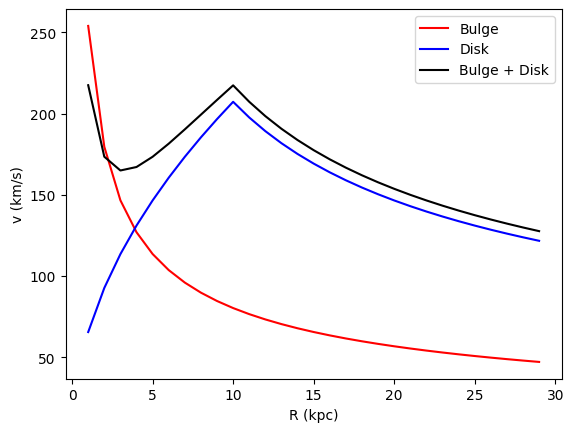

In [ ]:
plt.plot(R_arr.to(u.kpc), v_bulge.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)') # label x axis as R (kpc)
plt.ylabel('v (km/s)') # label y axis as v (km/s)
plt.legend() # to show the legend of a figure
plt.show()

In [ ]:
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006.txt


In [ ]:
# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

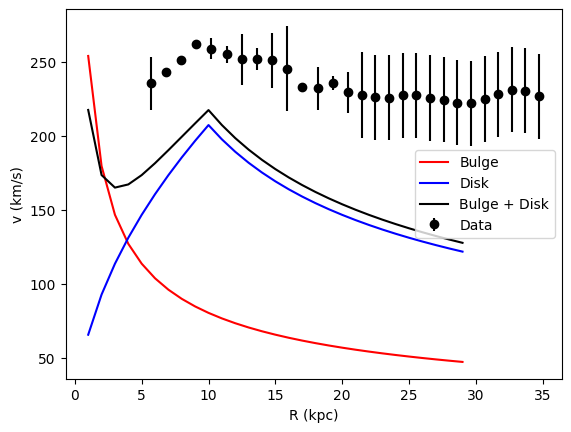

In [ ]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

# Overplot our calculations, basically copy and pater from the previous plotting coding cell
plt.plot(R_arr.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [ ]:
M_halo = 1e12 * u.solMass # Define halo total mass
R_halo = 50 * u.kpc # Define the outer edge of halo radius
density_halo = M_halo / (4/3 * np.pi * (R_halo**3)) # here the density is in the unit of solar mass per cube kpc (formula for a sphere)
print(density_halo.to(1e6 * u.solMass/u.kpc**3)) # show density of the halo

1.9098593171027443 1e+06 solMass / kpc3


In [ ]:
def calculatingEnclosedMassForHalo(R, density=1.91 * 1e6 * u.solMass/u.kpc**3): # Lets us calculate mass of halo
    """
    Calculate enclosed mass for the halo component
    Input: R - orbital radius, density - density of the halo as calculated above
    Output: M - enclosed mass
    """

    if R <30 * u.kpc: #limits at 30 since array stops at 30
        M = 4/3 * np.pi * (R**3) * density # Formula for enclosed mass of halo
    return(M)

In [ ]:
print(calculatingEnclosedMassForHalo(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForHalo(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc") # Make sure mass is different at different R

8.000589291142006 1e+06 solMass at 1 kpc
1000.073661392751 1e+06 solMass at 5 kpc


In [ ]:
def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass, density_halo=1.91 * 1e6 * u.solMass/u.kpc**3): #Lets us calculate mass of the milky way
    M_halo = calculatingEnclosedMassForHalo(R, density=density_halo) # Mass of the halo
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk) # Mass of the disk
    M_total = M_disk + M_bulge + M_halo #Total mass is the mass of the bulge, disk, and halo
    return(M_total) # Gives us total mass

In [ ]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_arr)) * u.solMass # Don't forget unit here
M_halo = np.zeros(len(R_arr)) * u.solMass # Set them as zero for now since they are different at different radii
M_total= np.zeros(len(R_arr)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_arr)): # Use the [i] for different R in the arr
    M_disk[i] = calculatingEnclosedMassForDisk(R_arr[i]) # Finds mass of disk at a specific R
    M_halo[i] = calculatingEnclosedMassForHalo (R_arr[i]) # Finds mass of halo at a specific R
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_arr[i]) # Finds total mass at a specific R
# Calculating the resulting orbital velocity due to each component
v_disk_arr = CalculatingOrbitalVelocity(M_disk, R_arr) # Finds orbital celocity of the disk
v_halo_arr = CalculatingOrbitalVelocity(M_halo, R_arr) #Finds orbital velocity of the halo
v_halo_bulge_disk_arr = CalculatingOrbitalVelocity (M_total, R_arr) # Finds orbital velocity of the bulge, disk, and halo all together

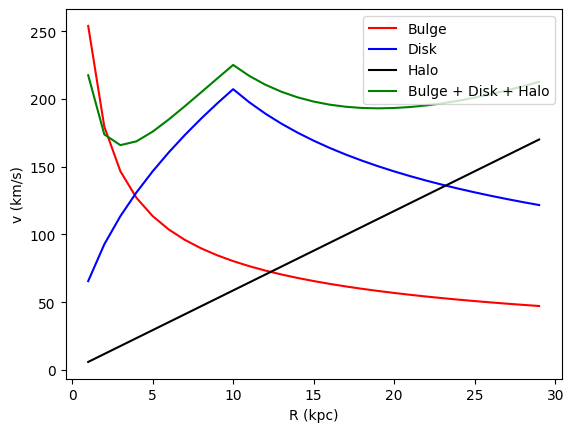

In [ ]:
plt.plot(R_arr.to(u.kpc), v_bulge.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="black", label="Halo") # plotting halo components
plt.plot(R_arr.to(u.kpc), v_halo_bulge_disk_arr.to(u.km/u.s), color="green", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.xlabel('R (kpc)') # Labels x axis as R (kpc)
plt.ylabel('v (km/s)') # Labels y axis at v (km/s)
plt.legend() # to show the legend of a figure
plt.show()

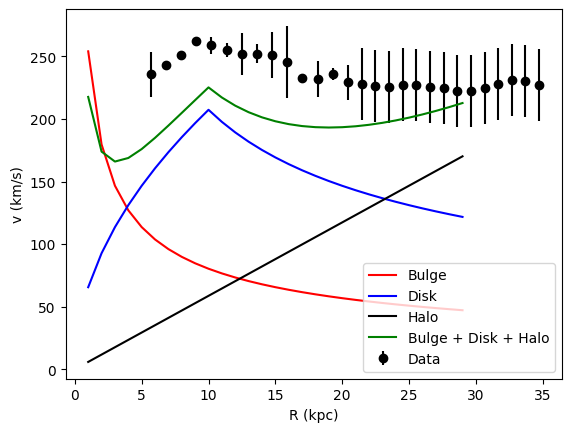

In [ ]:
# Plot the data
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")

plt.plot(R_arr.to(u.kpc), v_bulge.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="black", label="Halo") # plotting halo components
plt.plot(R_arr.to(u.kpc), v_halo_bulge_disk_arr.to(u.km/u.s), color="green", label="Bulge + Disk + Halo") # plotting bulge + disk + halo components
plt.xlabel('R (kpc)') # Labels x axis as R (kpc)
plt.ylabel('v (km/s)') # Labels y axis at v (km/s)
plt.legend() # to show the legend of a figure
plt.show()